<a href="https://colab.research.google.com/github/NotAndex/Demo/blob/main/time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Preamble
---

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/NotAndex/Demo/blob/256500a36f2bf5327282818a541dc9bf415fa4d7/time_series_forecasting.ipynb"><img src="https://github.com/NotAndex/Demo/blob/main/images/GitHub-Mark-32px.png?raw=true" />View this code on GitHub.com</a>
  </td>
    <td>
    <a target="_blank" href="https://github.com/NotAndex/Demo/blob/main/time_series_feature_engineering.ipynb"><img src="https://github.com/NotAndex/Demo/blob/main/images/GitHub-Mark-32px.png?raw=true" />View time_series_feature_engineering on GitHub.com</a>
  </td>
    <td>
    <a target="_blank" href="https://github.com/NotAndex/Demo/blob/main/scientific_sources.md"><img src="https://github.com/NotAndex/Demo/blob/main/images/GitHub-Mark-32px.png?raw=true" />View scientific sources on GitHub.com</a>
  </td>
</table>

# 1 Setup
---

In [ ]:
import os
import datetime

#download yfinance package
!pip install yfinance
import yfinance as yf
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (16, 9)
mpl.rcParams['axes.grid'] = False

#2 Data Mining / Web Scraping
---

Having a lot of data is most important for machine learning approaches. What is a sufficient amount of data is different from case to case. In general more is always better. In principle, all available sources should be considered in the harvesting (mining) process. But in reality, there are monetary, access, and technical effort constraints. When the question arises of what data to look for, the science can be consulted (s. [Scientific sources](https://github.com/NotAndex/Demo/blob/main/scientific_sources.md)). Afterwards, the own creativity can expand on this foundation.

In this demo, data could be harvested from various sources (not a complete list):
* [finance.yahoo.com](https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD&.tsrc=fin-srch) | (Python Project)
* [coinmarketcap.com/api/](https://coinmarketcap.com/api/) | (REST API) -> [CMC Pricing Model](https://coinmarketcap.com/api/pricing/)
* [bitinfocharts.com/bitcoin/](https://bitinfocharts.com/bitcoin/) | (Web Scraping)
* [binance-docs.github.io/apidocs/spot](https://binance-docs.github.io/apidocs/spot/en/#market-data-endpoints) | (REST API)
* [tradingview.com/rest-api-spec/#operation/getHistory](http://tradingview.com/rest-api-spec/#operation/getHistory) | (REST API)
* Sentinment and interest Data (Google Trends, Twitter)
* etc.


Finally, it is important to figure out the data (features) that have a positive impact on the forecast performance preferably in an automated process (s. 3.2). As a result, expensive sources can be switched on for evaluation. If these do not give any advantage after factoring in their cost, they do not have to be maintained. 


## 2.1 BTC-USD dataset
---

In this Demo, the data will be downloaded from [finance.yahoo.com](https://finance.yahoo.com/quote/BTC-USD?p=BTC-USD&.tsrc=fin-srch) [Data provided by [CoinMarketCap.com](https://coinmarketcap.com/)] with help of the [yfinance](https://pypi.org/project/yfinance/) project. This data contains the financial time series common features Date, Open, High, Low, Close, and Volume of the last three years for the price (USD) of Bitcoin. In the further Demo, for simplicity, only Close Price will be utilized (see 3.1 Feature Engineering).

In [ ]:
today = datetime.date.today()
start_date = today - datetime.timedelta(days=365*3)
symbol = 'BTC-USD'

cc_data = yf.download(symbol, start=start_date, end=today)
cc_data.reset_index(inplace=True,col_fill=('Date'))

[*********************100%***********************]  1 of 1 completed


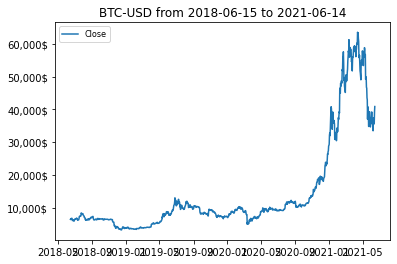

In [ ]:
fig1, ax1 = plt.subplots()
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}$'))
ax1.plot(cc_data['Date'], cc_data['Close'],label = 'Close')
ax1.set_title((f'{symbol} from {start_date} to {today}'), fontsize = 12)
ax1.legend(fontsize=8)

# 3 Data Preprocessing
---

The first step in Data Preprocessing after harvesting the data from different sources is Data Cleansing. The data in this demo is clean already. Therefore it will not be part of this demo. However in many scenarios, this will not be the case and a process needs to be in place on how to handle missing, faulty, or out-of-range values. Is it possible to salvage them or are they needed to be dismissed? In any case, always avoid [garbage in, garbage out](https://en.wikipedia.org/wiki/Garbage_in,_garbage_out)!

## 3.1 Feature Engineering
---

**Feature Engineering and multivariate prediction models will not be part of this free (demo purpose only) notebook, due to their high effort requirements.** Nevertheless, all code provided in this notebook will be able to handle multivariate inputs. 

Creative and sophisticated feature engineering can be an integral task to help the machine understand data better to produce the best possible results. Here is a very little glimpse of what could be done: [time_series_feature_engineering.ipynb](https://github.com/NotAndex/Demo/blob/main/time_series_feature_engineering.ipynb)



## 3.2 Feature Selection
---

When all data (features) are harvested and engineered, the selection of the right features is essential to improve the model performance. Not only in regards to accuracy but in regards to computational complexity, cost, and, speed.

For example, Mudassir et al, (2020) determined feature importance by using an ensemble method based on random decision forest and derived from this importance a reduced set of features. On the reduced feature set a multi-collinearity (Variance inflation factor (VIF)) and cross-correlations (Pearson) check is conducted. Further Mudassir et al, (2020) show that the set of relevant features shift for different forecasting horizons.

After feature pre-selection and after model training, the importance of the features needs to be reevaluated. This post-selection should be used as feedback to further optimize the feature selection. One approach is to compute the [Shapely Value](https://christophm.github.io/interpretable-ml-book/shapley.html#the-shapley-value-in-detail) for all features. **"Be careful to interpret the Shapley value correctly: The Shapley value is the average contribution of a feature value to the prediction in different coalitions. The Shapley value is NOT the difference in prediction when we would remove the feature from the model."** (Molnar, 2020).


## 3.3 Training, Validation, and Test Data Split
---

In [ ]:
data = cc_data.loc[:,['Close']]

len_data = len(data)
train_data = data[0:int(len_data*0.7)] # 70%
val_data = data[int(len_data*0.7):int(len_data*0.9)] # 20%
test_data = data[int(len_data*0.9):] # 10%


## 3.4 Data Normalization
---


In [ ]:
train_data_mean = train_data.mean()
train_data_std = train_data.std()

train_data = (train_data - train_data_mean) / train_data_std
val_data = (val_data - train_data_mean) / train_data_std
test_data = (test_data - train_data_mean) / train_data_std

## 3.5 Data Set Generator Pipeline
---

Due to the memory function of LSTM models, a set of predictions is made based on a window of consecutive samples (sequence) from the data. The data windowing will come in handy when different specs of forecasting input steps, horizons, and model implementations are evaluated against each other.

### 3.5.1 Window Generator
---

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df, val_df, test_df, label_columns=None):
    
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
def plot(self, model=None, plot_col='Close', max_subplots=5):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [h]')

WindowGenerator.plot = plot

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=False,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

#4 Prediction Models
---
This demo purposes only notebook shows simple and untuned LSTM neural networks.

However, depending on the case, diffrent machine learning prediction models can be used (be the best):
- Neural networks
 - Feedforward neural networks
 - LSTM & GRU
- Tree-based models
 - Random forest
 - Gradient boosting classifier


Compile and Fit function

In [ ]:
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=20,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

## 4.1 Univariate Input and Single Step Output Models
---

In [ ]:
val_performance = {}
performance = {}

### 4.1.1 LSTM
---

#### 4.1.1.1 Model definition, compile, and fit
---

In [ ]:
wide_window = WindowGenerator(
    input_width=50, label_width=50, shift=1,
    train_df=train_data, val_df=val_data, test_df= test_data,
    label_columns=['Close'])

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()

#### 4.1.1.2 Model Performance and Plot
---

2/2 [==============================] - 0s 15ms/step - loss: 346.1305 - mean_absolute_error: 18.2881
{'LSTM': [346.1304626464844, 18.288129806518555]}
{'LSTM': [22.51387596130371, 2.873323440551758]}


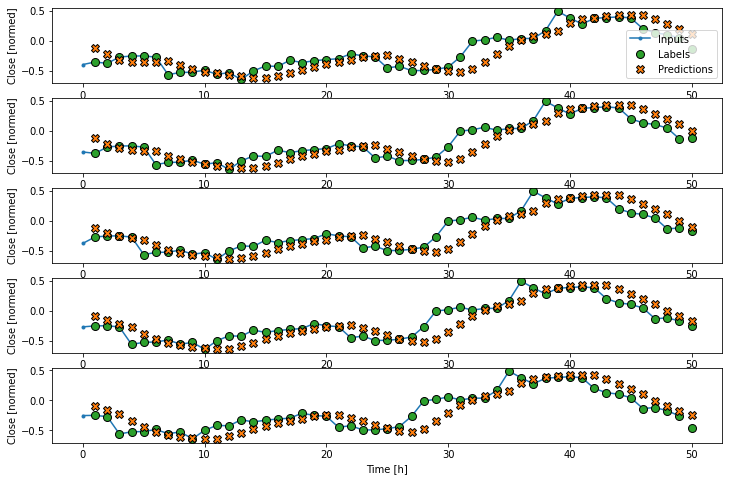

In [ ]:
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM']= lstm_model.evaluate( wide_window.test)
print(performance)
print(val_performance)

wide_window.plot(lstm_model)

## 4.2 Univariate Input and Multi Step Output Models
---

In [ ]:
multi_val_performance = {}
multi_performance = {}

### 4.2.1 LSTM
---

#### 4.2.1.1 Model definition, compile, and fit
---

In [ ]:
OUT_STEPS = 7
num_features = data.shape[1]

multi_window = WindowGenerator(input_width=7*4,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS, 
                               train_df=train_data,val_df=val_data,test_df=test_data)


multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

#### 4.2.1.2 Model Performance and Plot
---

3/3 [==============================] - 0s 8ms/step - loss: 319.4626 - mean_absolute_error: 17.3257


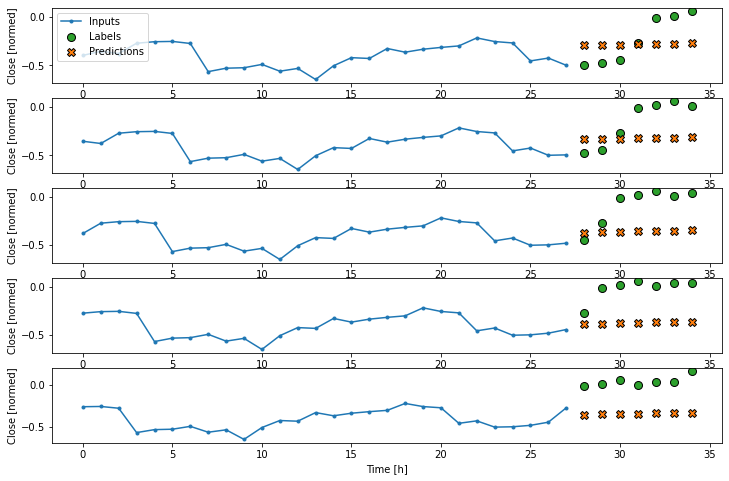

In [ ]:
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test)
multi_window.plot(multi_lstm_model)

## 4.3 Model Evaluation
---

All the different models' forecasting performances need to be analyzed and evaluated, based on their predictive accuracy. It is also necessary to compare the significance of the differences in model prediction (“Comparing predictive accuracy” (Diebold and Mariano, 2020)).
